## Protein Level Duplication Search

### spiro.faa

In [62]:
#Read Spiro protein fasta in tabular format
#Headers= 0:id 1:seq 3:length
import pandas as pd
df=pd.read_csv("/opt/zeynep/spironucleus/tabular_spiro", sep='\t', header= None)
df=df.iloc[1:]
df=df.drop(columns=2)
df.head()

,0,1,3
1,SS50377_20001,MSSGLSIEFKAIPYSVDQGYNVIINKKIKKLKFTIRDNEISQSIQL...,1793
2,SS50377_20002,MHDPTHPYRYQMQQVSSSADVASLQQNSSQRVVVTIQHSSIPMLRS...,215
3,SS50377_20003,MPTASTQARSTKMWKAQASIISVLFLINYDIATSLGPDHQLALSSS...,153
4,SS50377_20004,MICVSFAAMNRSINQRISILSPTPPRRLNNLPFSYSVKIIVTKHVY...,291
5,SS50377_20005,MTEDLFVEFEAIPFSVDVNKNVIVSNTILQIKFTIRDNEISQSIQL...,1480


In [63]:
df.describe()

,0,1,3
count,8668,8668,8668
unique,8668,8077,1269
top,SS50377_20897,MAGRTALEARRLAAADFTGAAEEKNRIIPRITQVRPTRSIGGTRYH...,285
freq,1,12,49


<AxesSubplot:ylabel='Frequency'>

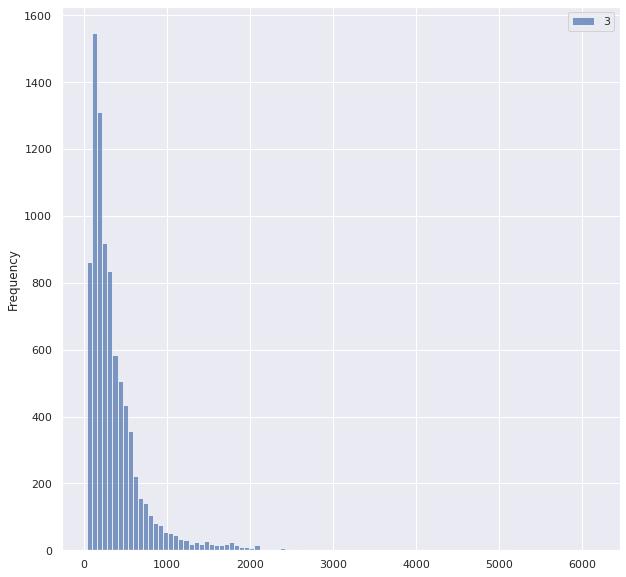

In [64]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pylab

sns.set(rc={'figure.figsize':(10,10)})
df[3]=df[3].astype(float)

df_plot=df[[0,3]]
df_plot.plot.hist(bins=100, alpha=0.7 )

## Nucleotide Level Duplication Search

### spiro-spiro Blastn

In [44]:
#Read Spiro-Spiro blastn search
blastn_file =("/opt/zeynep/spironucleus/spiro_spiro.blastn")
import pandas as pd

df=pd.read_csv(blastn_file, sep="\t", header=None)
df=df.drop(columns=[10,11,12,13,14])

# similarity threshold
df=df[(df[2]>95 )& (df[3]>1000)]
print(len(df))
df.head(10)

3773


,0,1,2,3,4,5,6,7,8,9
0,chr1,chr1,100.000,1924143,0,0,1,1924143,1,1924143
1,chr1,chr1,97.042,11631,317,22,19902,31520,8996,20611
2,chr1,chr1,97.042,11631,317,22,8996,20611,19902,31520
3,chr1,chr1,99.685,10796,34,0,1081551,1092346,1079671,1068876
4,chr1,chr1,99.685,10796,34,0,1068876,1079671,1092346,1081551
5,chr1,chr1,97.647,10923,231,19,34932,45838,20253,31165
6,chr1,chr1,97.647,10923,231,19,20253,31165,34932,45838
7,chr1,chr1,96.934,10925,306,25,34932,45838,9343,20256
8,chr1,chr1,96.934,10925,306,25,9343,20256,34932,45838
9,chr1,chr1,99.784,9259,19,1,1236980,1246238,1229538,1220281


### spiro.fa

In [45]:
#Read Spiro nucleotide fasta in tabular format
#Headers= 0:id 1:seq 3:length
df=pd.read_csv("/opt/zeynep/spironucleus/tabular_spiro_nuc", sep='\t', header= None)
df=df.iloc[1:]
df=df.drop(columns=2)
df.head()

,0,1,3
1,SS50377_20001,atgtcatcaggtttatctattgagtttaaagctattccatattcag...,5379
2,SS50377_20002,atgcatgatcccacgcatccctatcgttactagatgcaataagtat...,645
3,SS50377_20003,atgccaacagcatcgactcaggctcgtagcaccaaaatgtggaagg...,459
4,SS50377_20004,atgatttgtgtttcctttgctgctatgaatagatctataaattaac...,873
5,SS50377_20005,atgactgaagatttatttgtcgagtttgaagctattccattttcag...,4440


<AxesSubplot:ylabel='Frequency'>

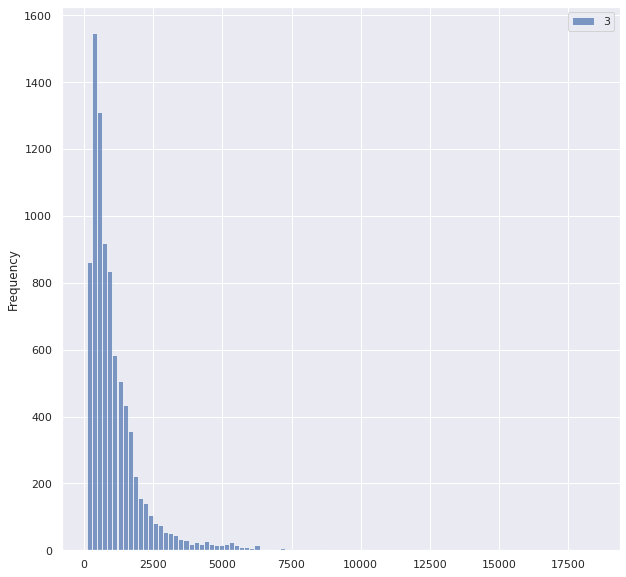

In [46]:
sns.set(rc={'figure.figsize':(10,10)})
df[3]=df[3].astype(float)
df_plot=df[[0,3]]
df_plot.plot.hist(bins=100, alpha=0.7 )

### Some Question:
1) What are the tig00000X contigs?

    a) Should we consider them as an individual chromosome?

    b) Why are they much shorter than the actual chromosomes?

2) How do we consider masked region in our duplication search? Should we ignore only the hard masked region or both soft and hard?



### spiro.scf.fa

In [58]:
#Read Spiro assembly fasta in tabular format
#Headers= 0:id 1:seq 3:length
df=pd.read_csv("/opt/zeynep/spironucleus/assembly/tabular_spro_assembly", sep='\t', header= None)
df=df.iloc[1:]
df=df.drop(columns=2)
df

,0,1,3
1,chr1,cctacctacctacctacctacctacctacctacctacctacctacc...,1924143
2,chr2,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,1908319
3,chr3,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,1864395
4,chr4,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,1733954
5,chr5,TACCTACCTACCTACCCTACCTAACCTACCTACCTACCTACCTACC...,1732135
6,chr6,cctaacctacctacctacctacctacctacctacctacctacctac...,1673122
7,chr7,TACCTACCTACCTACCTACCTACCTACCTACCTACCTACCTACCTA...,1610267
8,chr8,ACCCTACCTACCTACCTACCTACCTACCTACCTACCTACCTACCTA...,1071966
9,chr9,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,659440
10,tig00000001,AACCTACTACCTACCTACCTACCTACCTACCTACCTACCTACCTAC...,33199


/home/zeynep/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:ylabel='Frequency'>

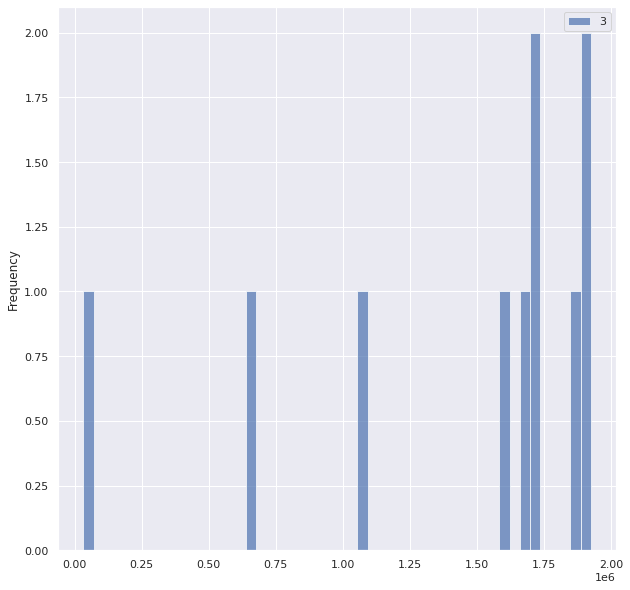

In [51]:
#First 9 chr lenght distribution
sns.set(rc={'figure.figsize':(10,10)})
df=df.iloc[0:10]
df[3]=df[3].astype(float)
df_plot=df[[0,3]]
df_plot.plot.hist(bins=50, alpha=0.7 )

/home/zeynep/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:ylabel='Frequency'>

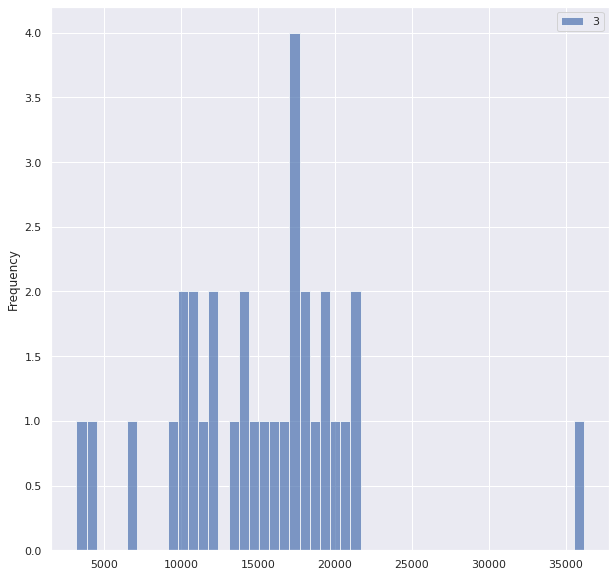

In [59]:
#tig00000X chromosomes length distribution
df=df.iloc[10:]
df[3]=df[3].astype(float)
df_plot=df[[0,3]]
df_plot.plot.hist(bins=50, alpha=0.7 )